# AMSA: Exploratory Data Analysis

## Relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data

In [2]:
default_train = pd.read_csv('../data/default_train.csv')
default_train.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,9WOZYHU33T,52,95210,68503,465,74,2,11.64,60,0.39,High School,Part-time,Single,No,No,Education,No,0
1,EX8Z0TNMOT,63,136031,233915,523,85,1,7.48,60,0.65,PhD,Unemployed,Married,No,Yes,Home,Yes,0
2,A9PXUMUBAA,66,116269,175600,680,113,3,14.06,36,0.11,High School,Full-time,Single,No,Yes,Auto,Yes,0
3,TZZ1ZWQQMI,39,96042,151913,619,46,2,17.88,12,0.19,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
4,YZ0VY3DWUG,50,138164,27020,342,74,1,2.45,60,0.38,Bachelor's,Unemployed,Divorced,No,No,Other,No,0


## EDA

In [3]:
# dimension in the analysis set
print(default_train.shape)

(178742, 18)


In [4]:
# examining missing values and data types in our analysis set
default_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178742 entries, 0 to 178741
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          178742 non-null  object 
 1   Age             178742 non-null  int64  
 2   Income          178742 non-null  int64  
 3   LoanAmount      178742 non-null  int64  
 4   CreditScore     178742 non-null  int64  
 5   MonthsEmployed  178742 non-null  int64  
 6   NumCreditLines  178742 non-null  int64  
 7   InterestRate    178742 non-null  float64
 8   LoanTerm        178742 non-null  int64  
 9   DTIRatio        178742 non-null  float64
 10  Education       178742 non-null  object 
 11  EmploymentType  178742 non-null  object 
 12  MaritalStatus   178742 non-null  object 
 13  HasMortgage     178742 non-null  object 
 14  HasDependents   178742 non-null  object 
 15  LoanPurpose     178742 non-null  object 
 16  HasCoSigner     178742 non-null  object 
 17  Default   

In [5]:
default_train.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
# summary statistics of the numerical features in the dataset
default_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,178742.0,43.518322,14.988245,18.0,31.00,44.00,56.00,69.0
Income,178742.0,82607.314146,38969.580662,15000.0,48943.00,82640.50,116344.00,149999.0
LoanAmount,178742.0,127721.189015,70847.032201,5001.0,66277.00,127817.00,189074.75,249998.0
CreditScore,178742.0,574.063824,158.951944,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,178742.0,59.573922,34.633072,0.0,30.00,60.00,90.00,119.0
NumCreditLines,178742.0,2.498786,1.117296,1.0,2.00,2.00,3.00,4.0
InterestRate,178742.0,13.492227,6.638372,2.0,7.77,13.45,19.25,25.0
LoanTerm,178742.0,36.022423,16.978711,12.0,24.00,36.00,48.00,60.0
DTIRatio,178742.0,0.500525,0.230955,0.1,0.30,0.50,0.70,0.9
Default,178742.0,0.116128,0.320380,0.0,0.00,0.00,0.00,1.0


When conducting EDA, we are trying to find hidden patterns in the data set in order to figure out what kind of features should be generated so that the model can capture these kind of patterns and most optimally make predictions based on the features that are present in the dataset.

We can first conduct the univariate EDA where we examine the pattern of each individual features.

### Univariate EDA

In [7]:
# Function for the density plot
# Function for creating a density plot with histogram as well as lines with indications for basic descriptive statistics
def plot_dist(data, columns): 
    
    num_columns = len(columns)
    
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    
    for i in range(num_columns): 
        
        mean_val = data[columns[i]].mean()
        std_dev = data[columns[i]].std()
        min_val = data[columns[i]].min()
        max_val = data[columns[i]].max()

        sns.kdeplot(
            data = data[columns[i]], 
            shade = True, 
            color = 'lightblue',
            ax = axes[i]
        )
        
        axes[i].set_title(f'{columns[i]}')
        axes[i].set_xlabel(f'{columns[i]}')
        axes[i].set_ylabel('Frequency')
        
        # Add vertical lines for mean, min, and max
        axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(mean_val + std_dev, color='g', linestyle='--', label=f'+1 Std Dev')
        axes[i].axvline(mean_val - std_dev, color='g', linestyle='--', label=f'-1 Std Dev')
        axes[i].axvline(min_val, color='b', linestyle='-', label=f'Min: {min_val:.2f}')
        axes[i].axvline(max_val, color='b', linestyle='-', label=f'Max: {max_val:.2f}')
        
        if i == 2: 
            axes[i].legend(loc = 'upper left')
        else:
            axes[i].legend(loc = 'upper right')

/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

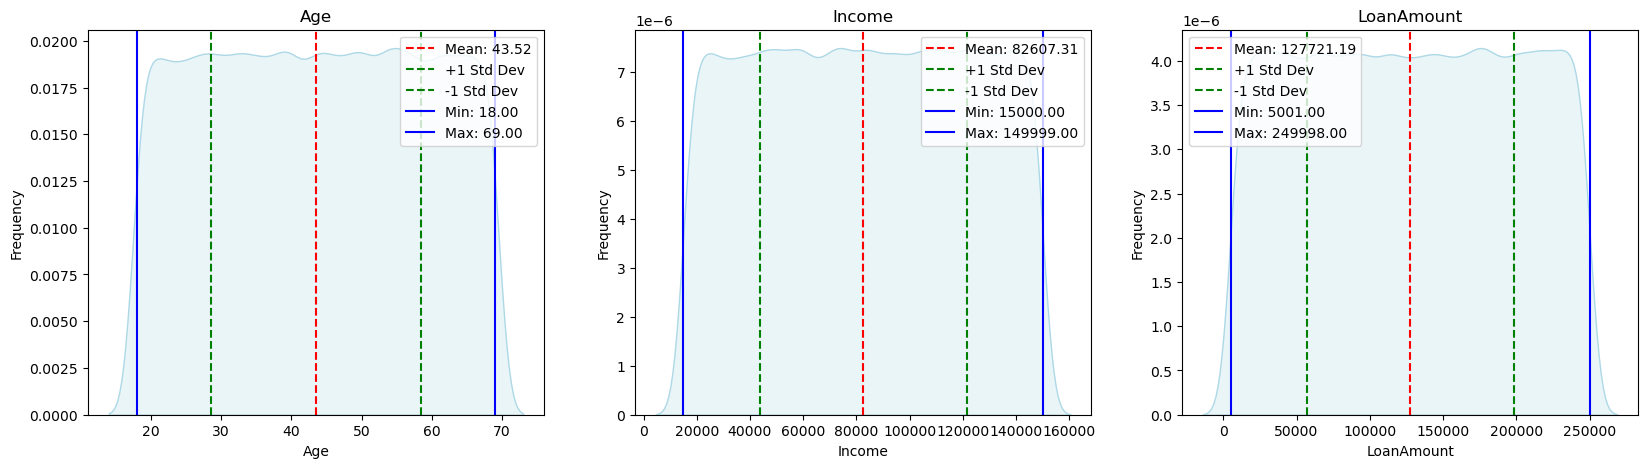

In [8]:
plot_dist(default_train, ['Age', 'Income', 'LoanAmount'])

/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

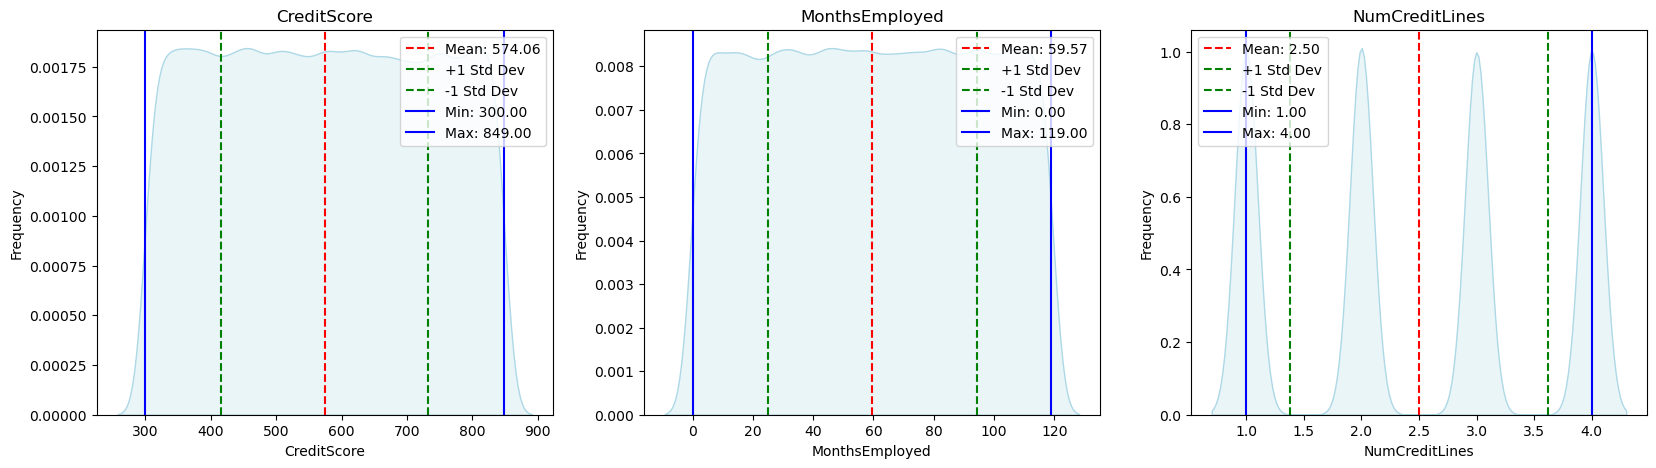

In [9]:
plot_dist(default_train, ['CreditScore', 'MonthsEmployed', 'NumCreditLines'])

/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/r9/vdz8z92156xgr9pywwt2yw980000gn/T/ipykernel_39247/3546928085.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/hiimpian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

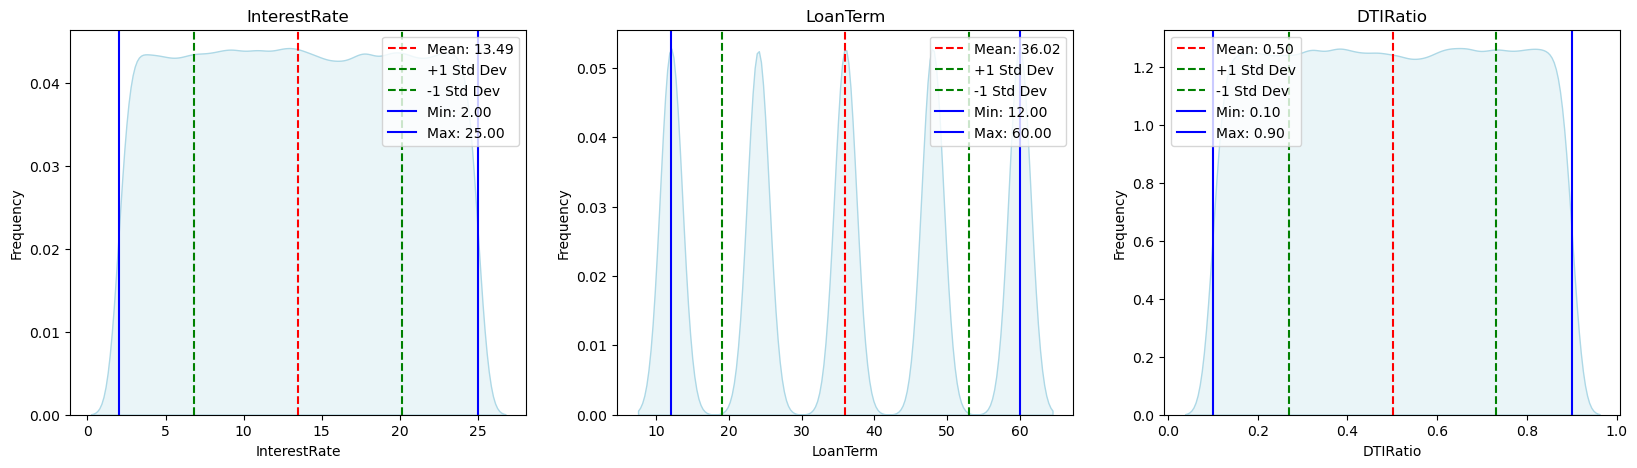

In [10]:
plot_dist(default_train, ['InterestRate', 'LoanTerm', 'DTIRatio'])

Based on the graphs above, it is evident that for all continuous featuers, they are all uniformly distributed. Whereas for NumCreditLines and LoanTerm, they are discrete features, they are ordrinal features. There seems to be no outliers for any features. 

### Bivariate EDA

Furthermore, we try to examine whether certain features will have potential to do a good job of explaining whether an individual will default on their loans or not. More specifically, we will use stacked bar chart for categorical and discrete features, and we will use box plot for continuous features.

In [11]:
# Function for stacked bar chart
def stacked_bar(df, cols): 
    for col in cols:
        frequency_table = pd.crosstab(df[col], df['Default'])
        frequency_table.plot(kind = 'bar', stacked = True, figsize = (5, 5))
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Stacked Bar Chart for {col}')
        plt.xticks(rotation = 0)
        plt.legend(title = 'Default')
        plt.tight_layout()
        
        plt.show()

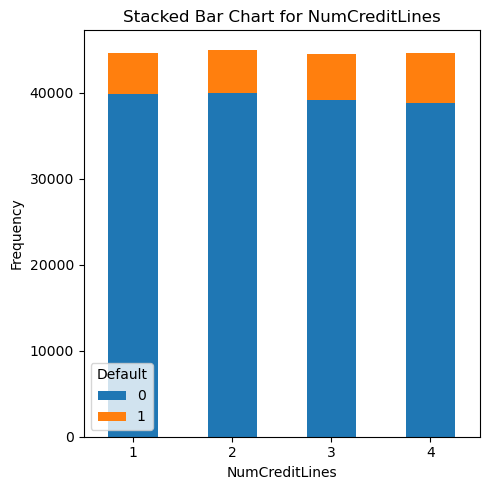

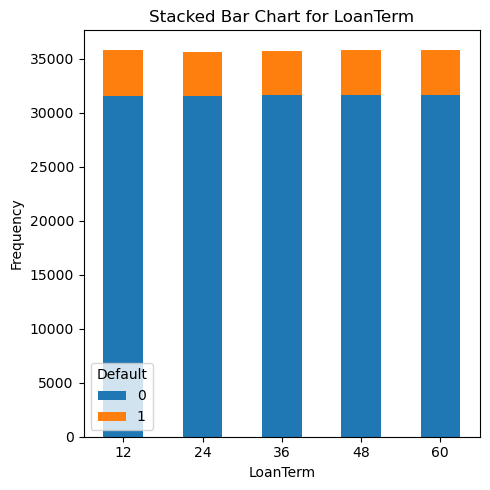

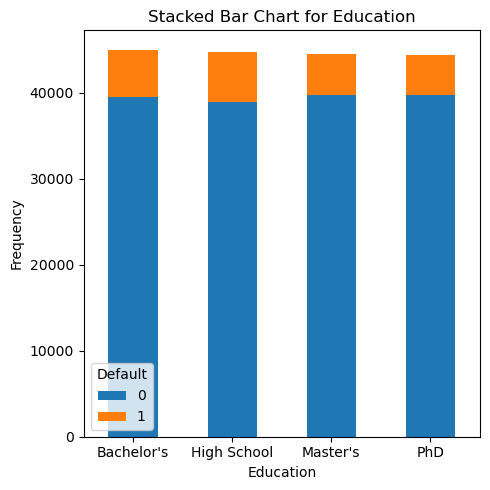

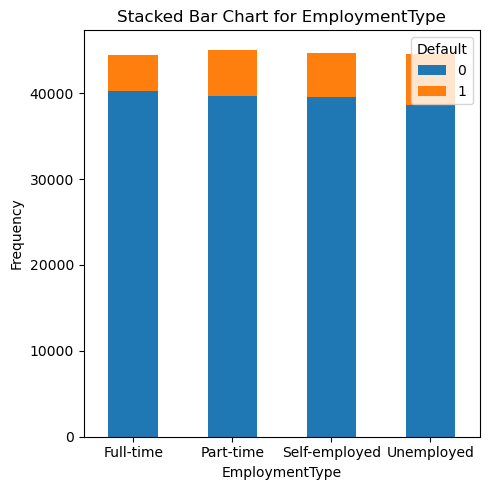

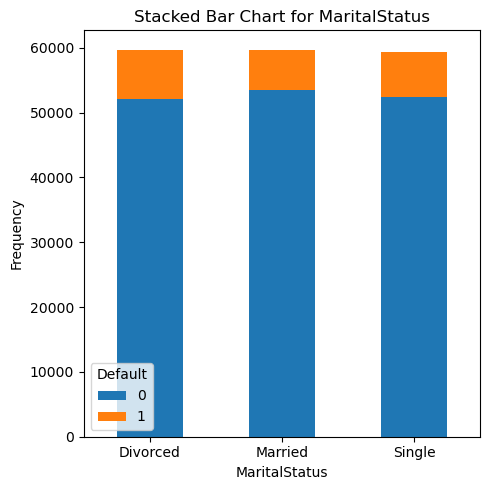

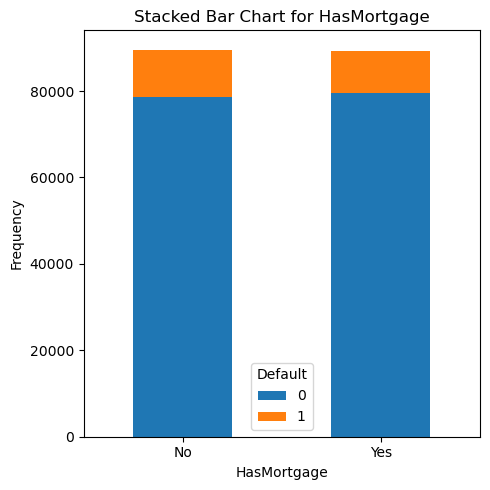

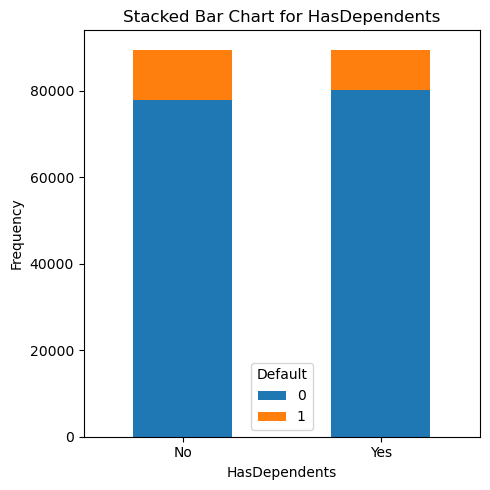

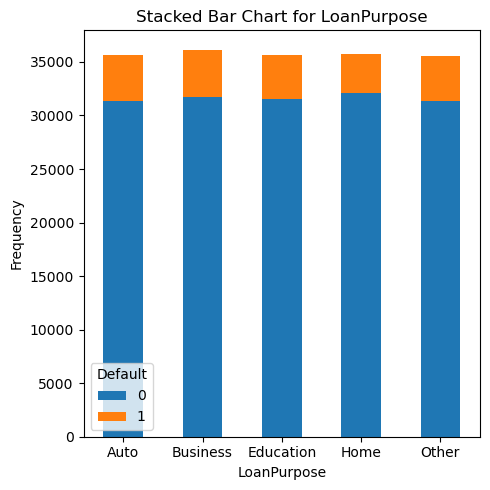

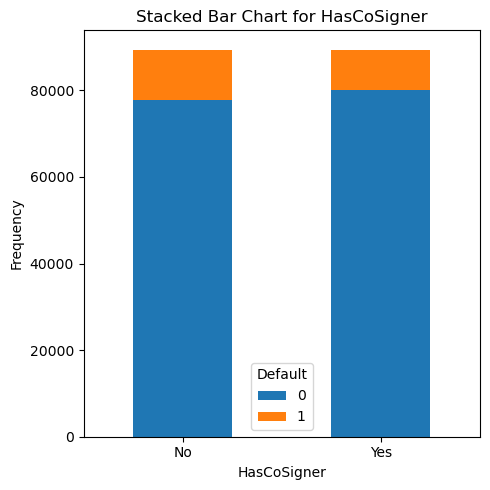

In [12]:
stacked_bar(default_train, ['NumCreditLines', 'LoanTerm', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'])

Based on the observations of the plots above, it is confirmed that categorical features and discrete features by themselves do not do a good job in explaining whether an individual will default on their loans or not. The reason for this is because for each categorical features, the proportion of defaulters and non-defaulters are almost identical among their unique categories. Indicating that no matter what categories they belong to, there is no clear indication that they will be more likely to default on their loans.

In [13]:
# Function to create box plot
def boxplot(df, cols, target): 
    for col in cols:
        plot = sns.boxplot(x = target, y = col, data = df)
        plt.xlabel(target)
        plt.ylabel(col)
        plt.title(f'Box Plot for {col} and {target}')
        plt.xticks(rotation = 0)
        plt.tight_layout()
        
        plt.show()

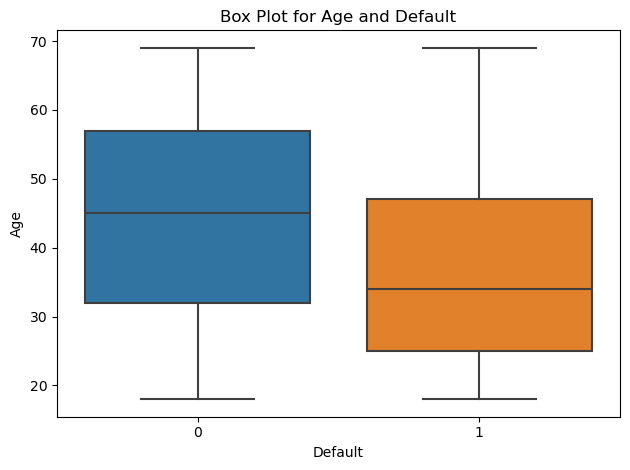

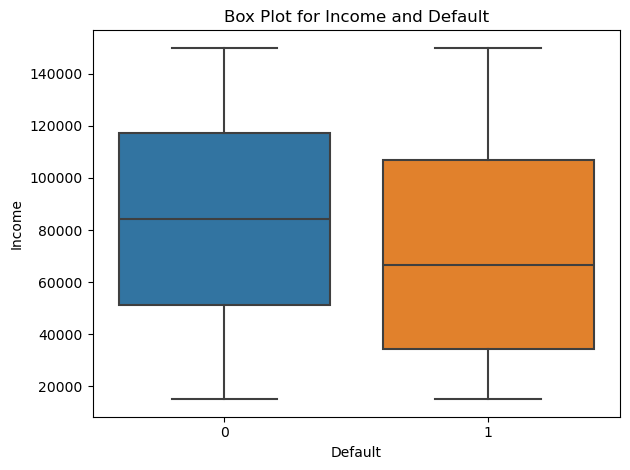

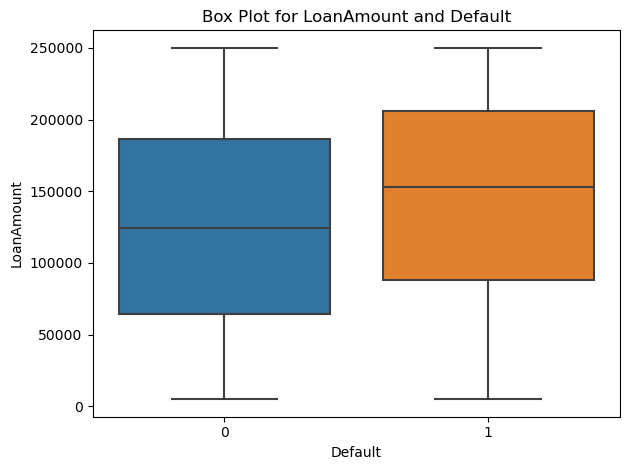

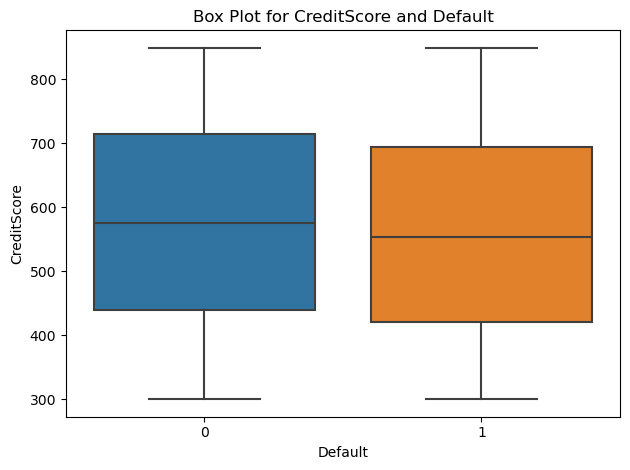

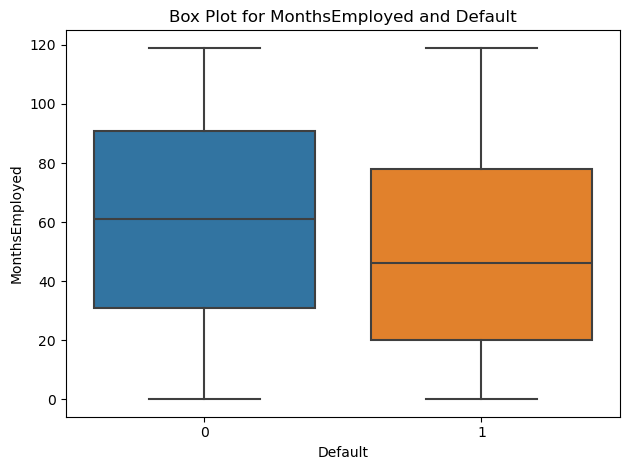

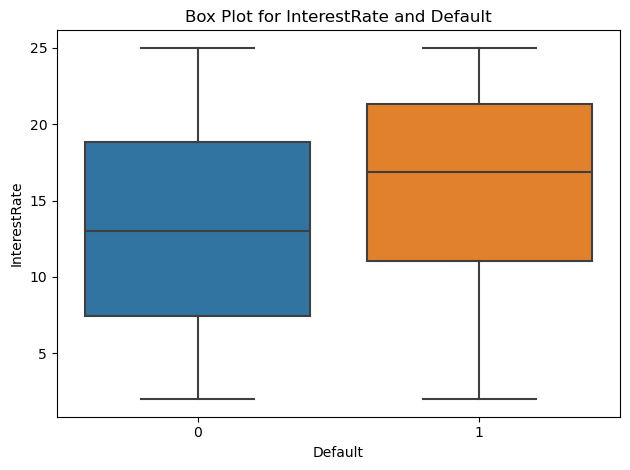

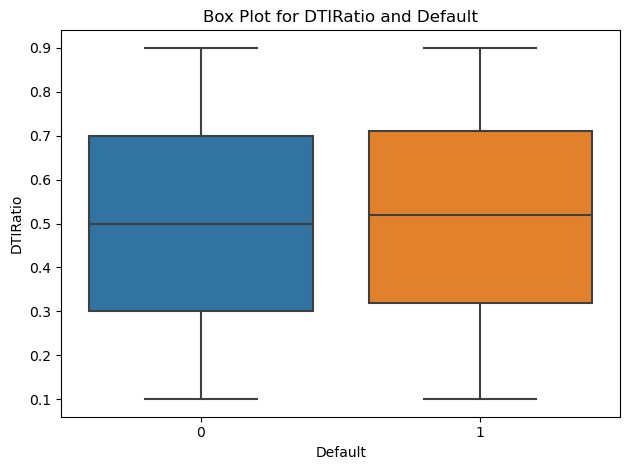

In [14]:
boxplot(default_train, ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio'], 'Default')

Based on the box plots generated above, it is apparent that for features that have low MI scores, there is not much different in their summary statistics when comparing defaulters vs non-defaulters. And the opposite whole for features with higher MI scores like Age, Income, and LoanAmount. However, it is interesing to see for InterestRate that although it has MI scores that are almost zero, there is a clear pattern that the mean interest rate between defaulters and non-defaulters do differ significantly, suggesting that it may indeed be the case that they have a significant influence in reducing uncertainty about whether individuals will default on their loans or not. 

#### Interaction effects

However, we can not overlook the fact that although certain features might have MI scores very low, or zero by itself, it may need to interact with other features in order to explain whether an individual will default on their loans or not.

To investigate this, we need to think about the possible interaction effects among the features in the data set. For instance, it may be the case that certain individuals with a certain educational degree would have higher level of income. 

In [15]:
# Function to create box plot
def boxplot_2(df, cols, target): 
    for col in cols:
        plot = sns.boxplot(x = col, y = target, data = df)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'Box Plot for {col} and {target}')
        plt.xticks(rotation = 0)
        plt.tight_layout()
        
        plt.show()

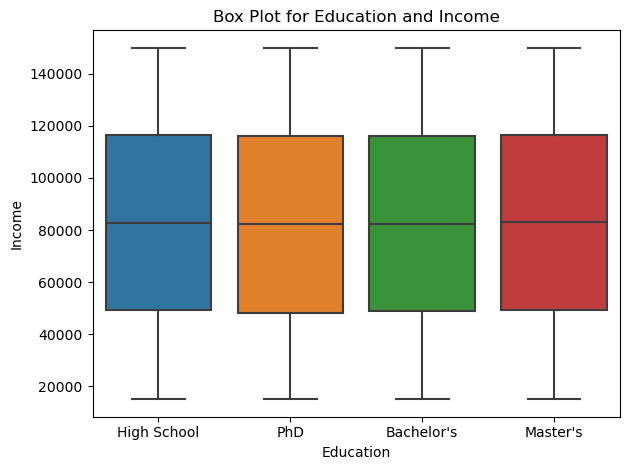

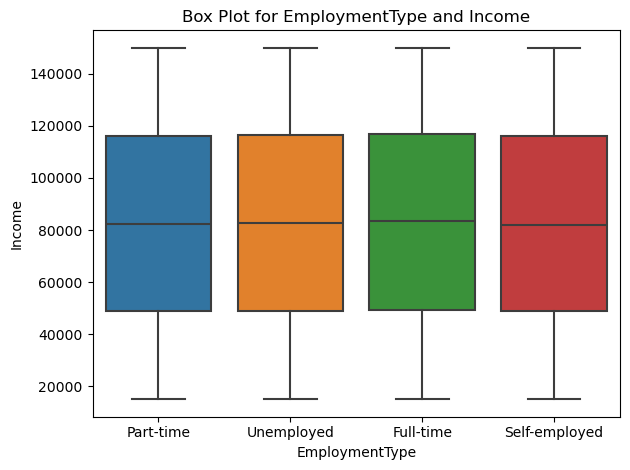

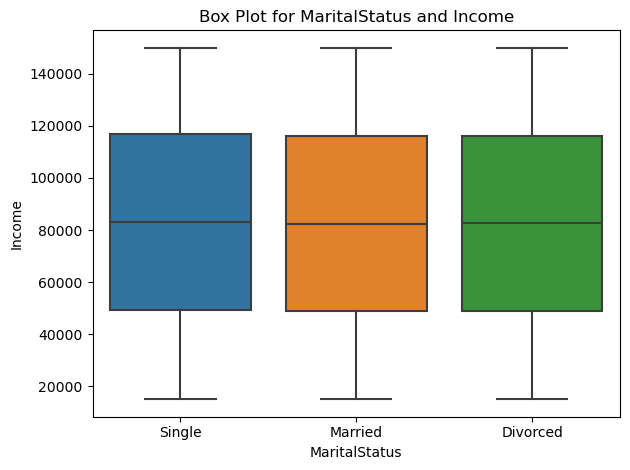

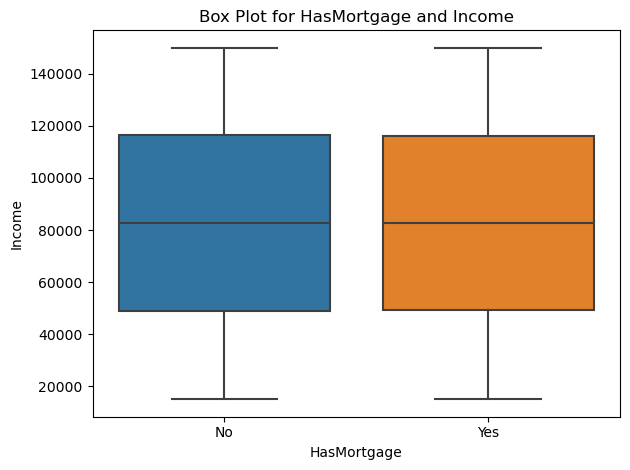

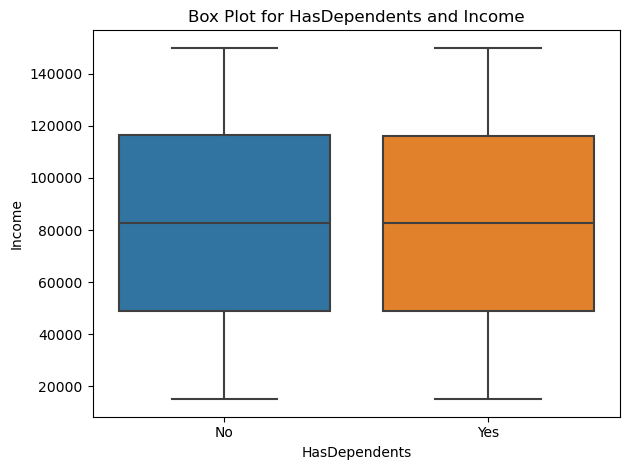

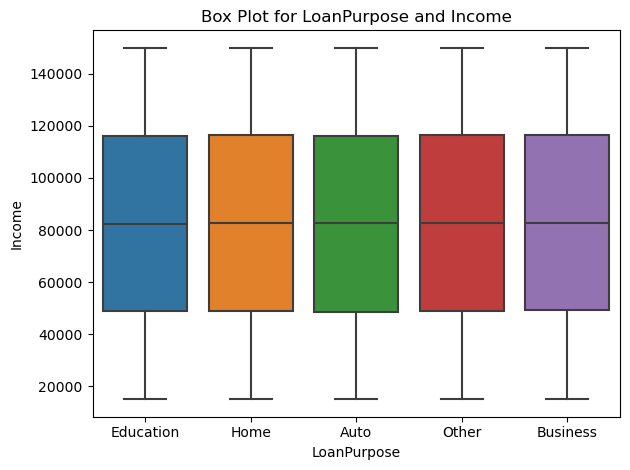

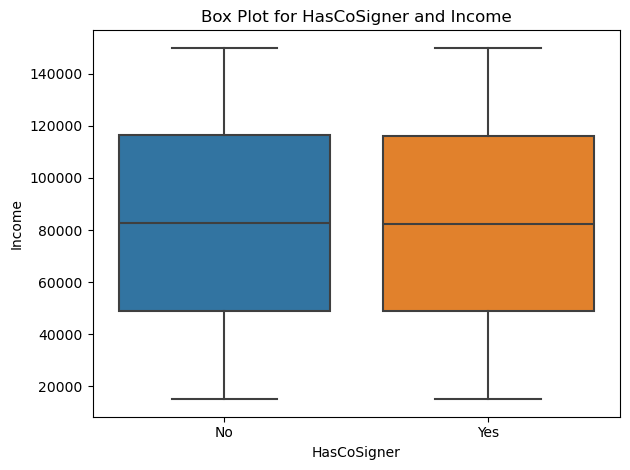

In [16]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'Income')

Unfortunately, there seems to be no interaction effect between the categorical features and Income because for each unique categories, the summary statistics or income is identical. So, including these interaction effects in the model won't be that beneficial for us.

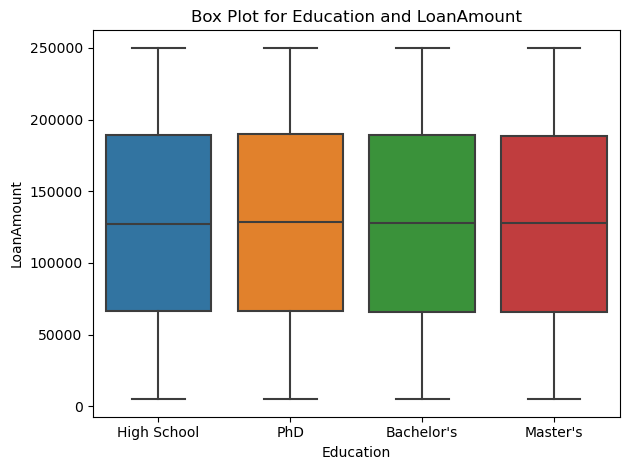

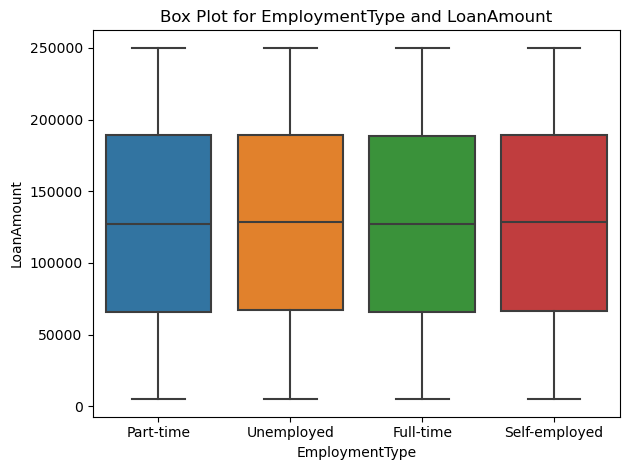

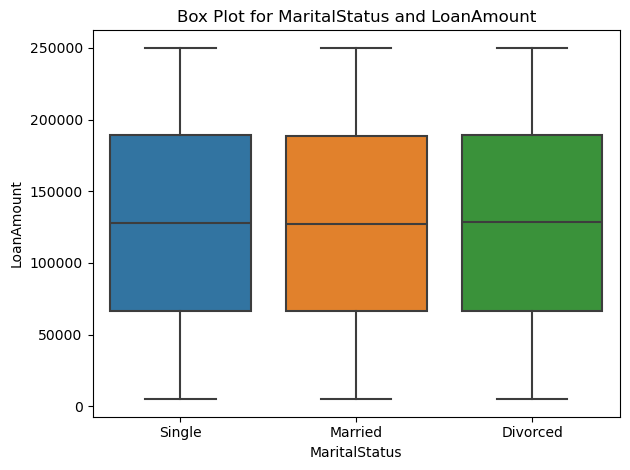

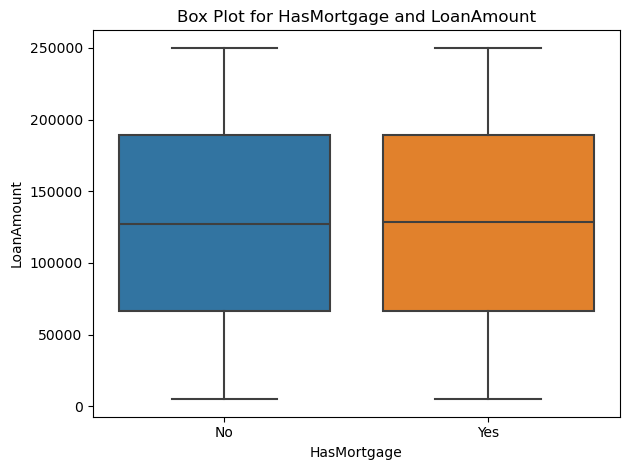

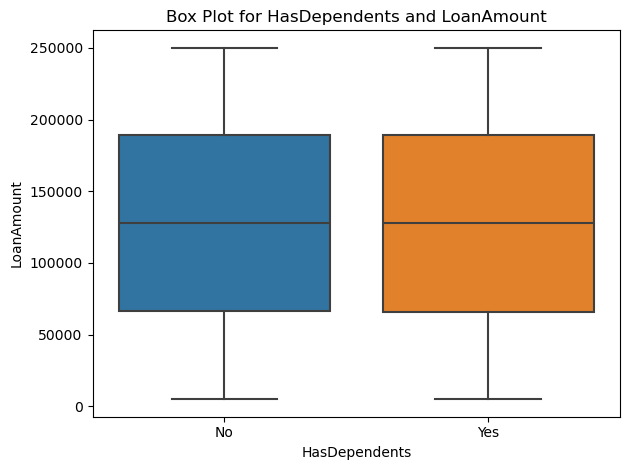

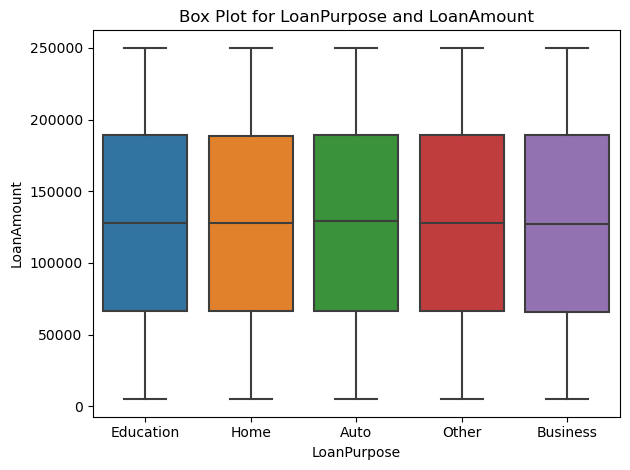

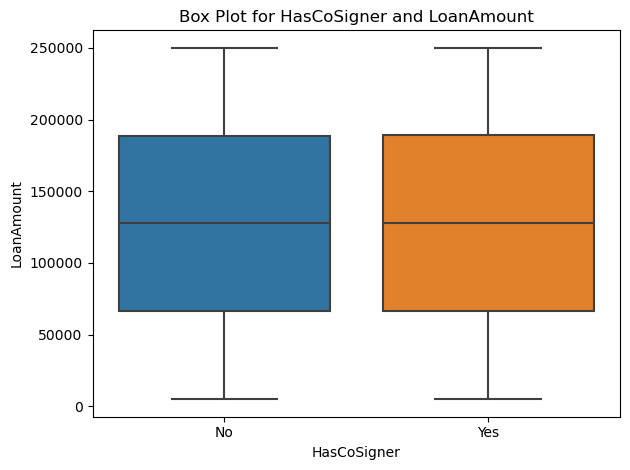

In [17]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'LoanAmount')

Same things hold for the interactions between the categorical features and LoanAmount.

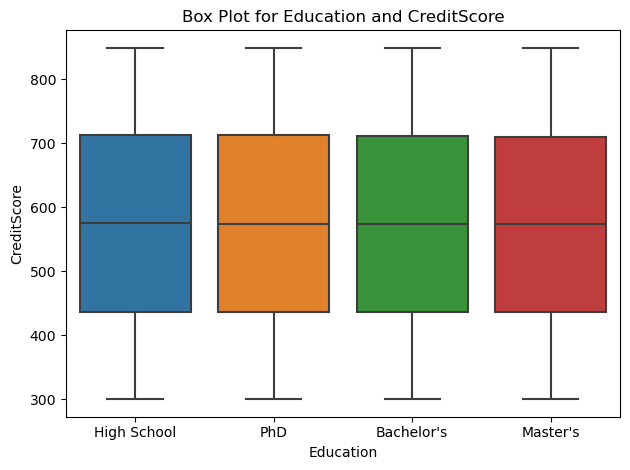

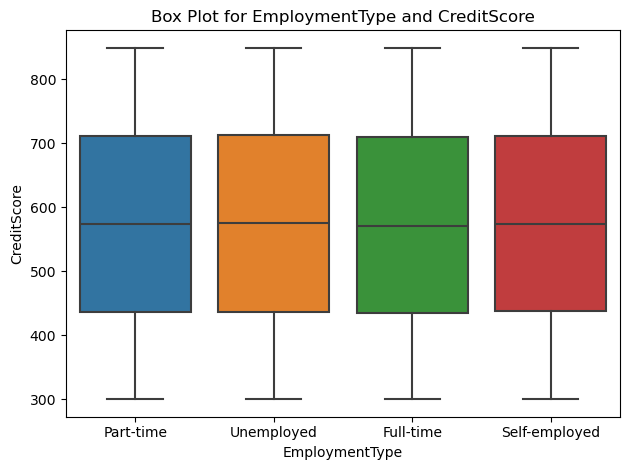

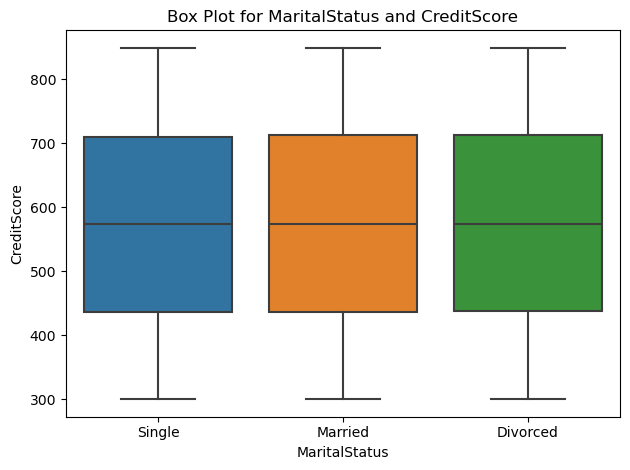

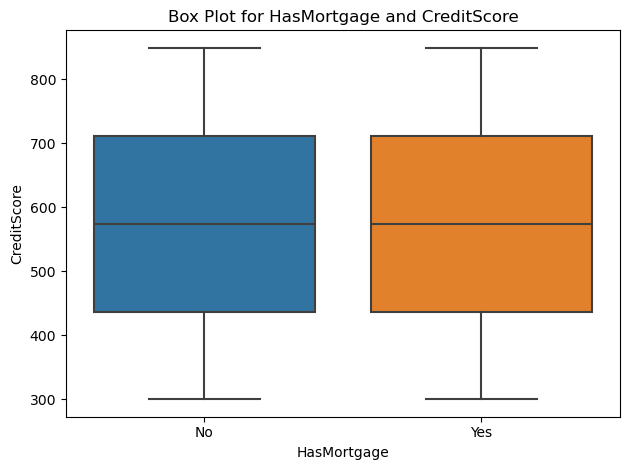

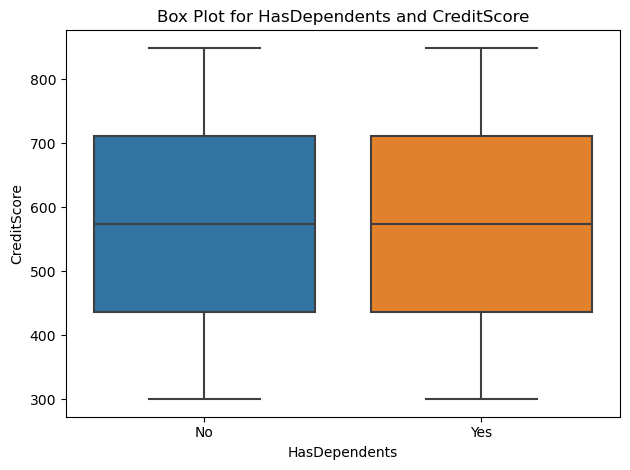

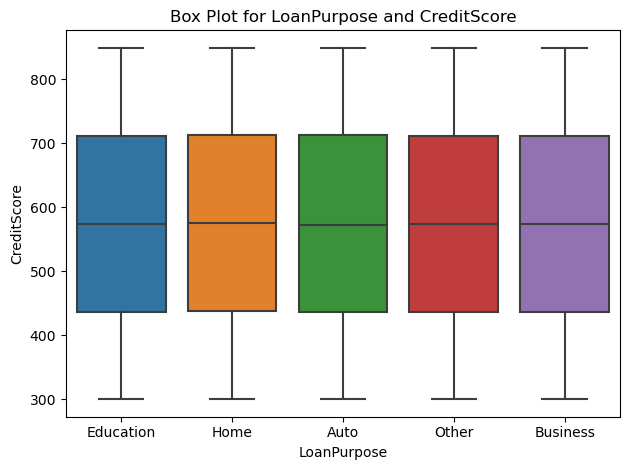

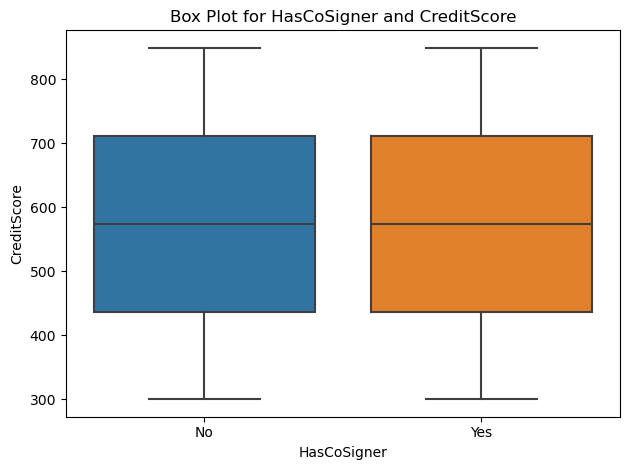

In [18]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'CreditScore')

Same conclusion also holds for CreditScore and the categorical features.

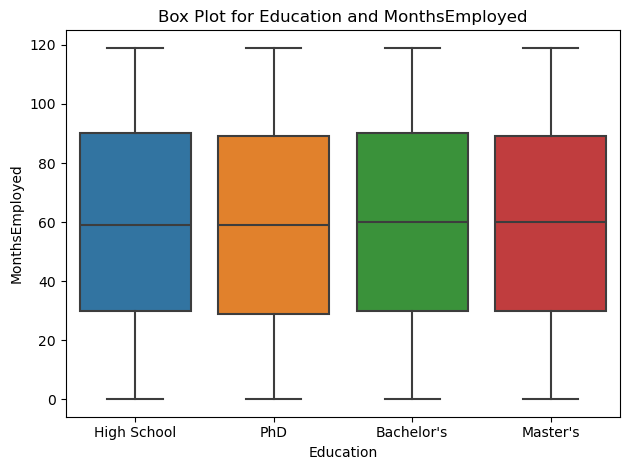

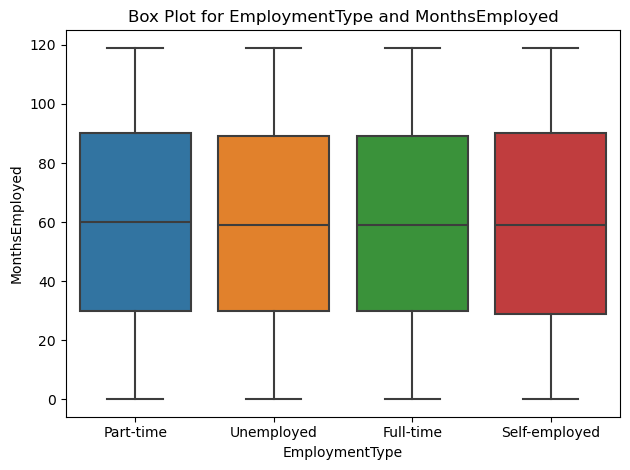

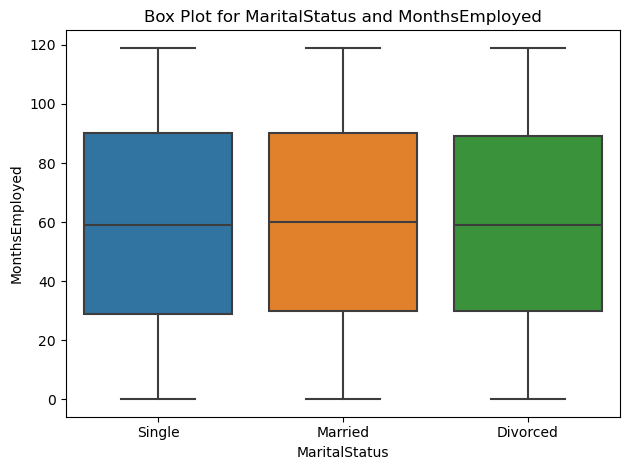

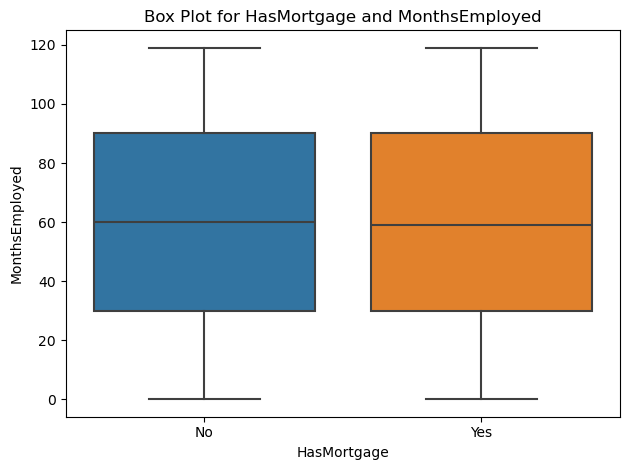

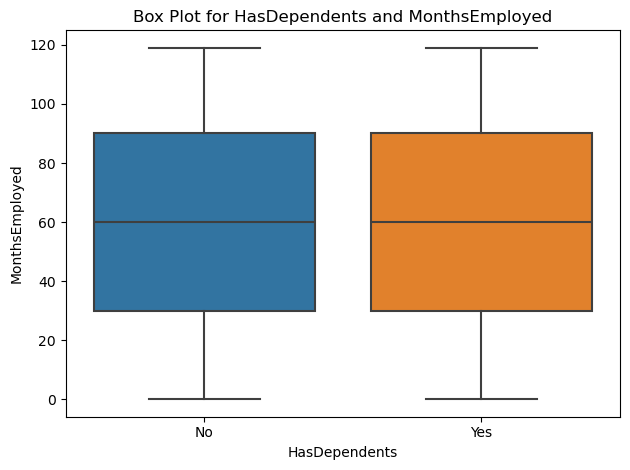

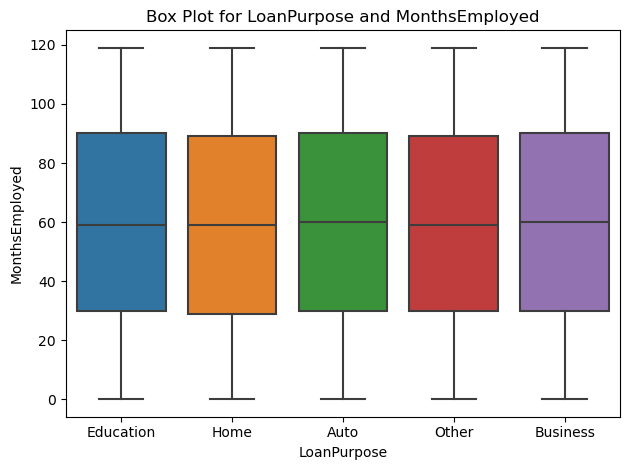

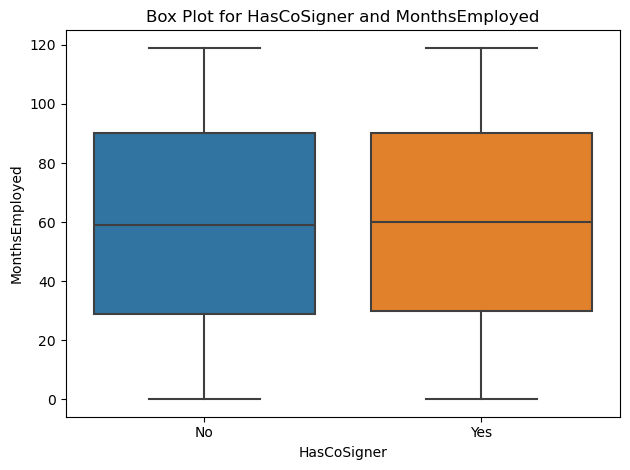

In [19]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'MonthsEmployed')

Also for MonthsEmployed.

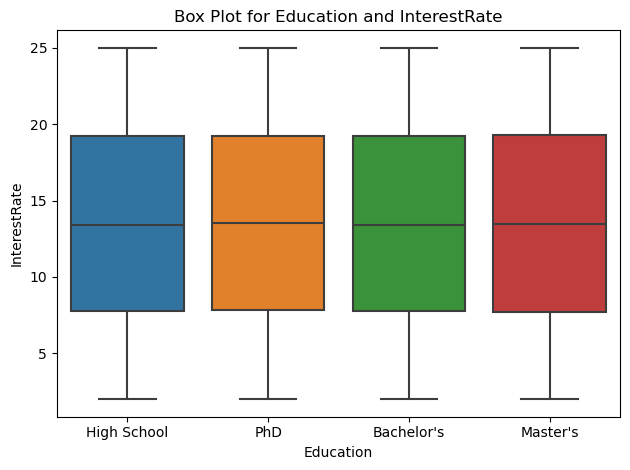

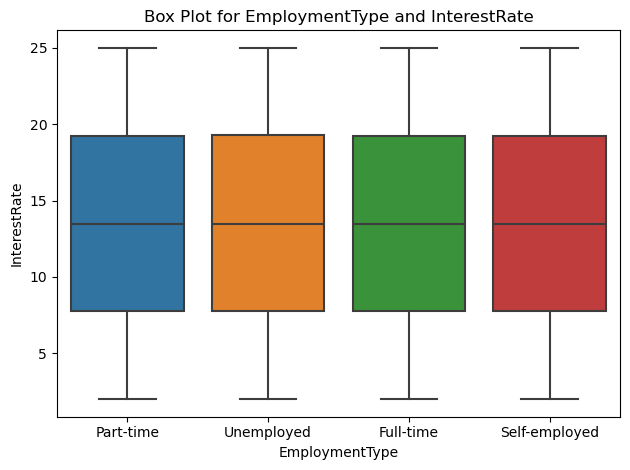

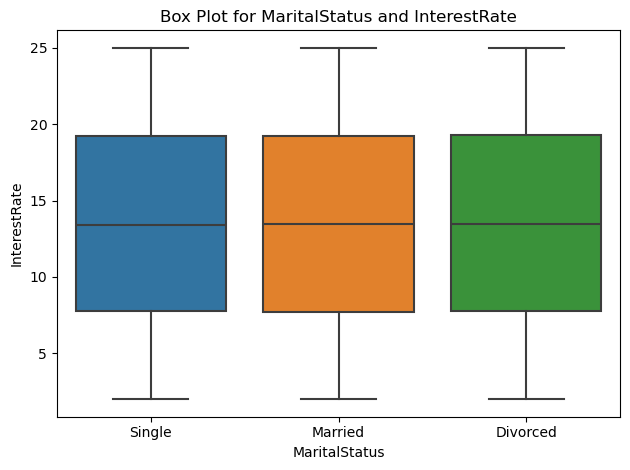

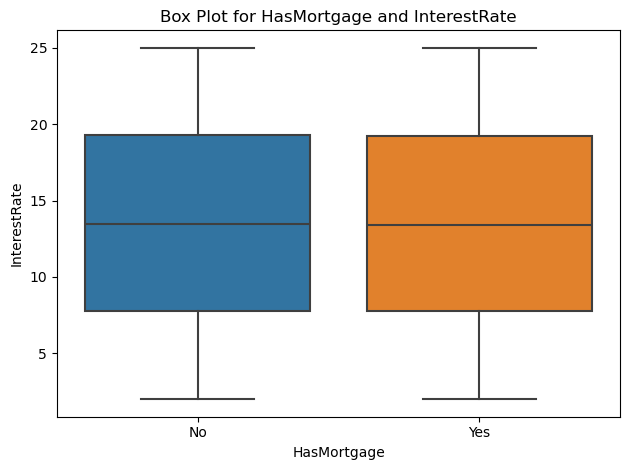

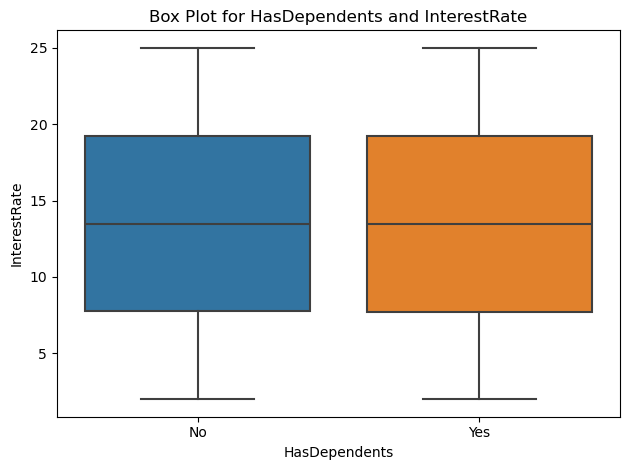

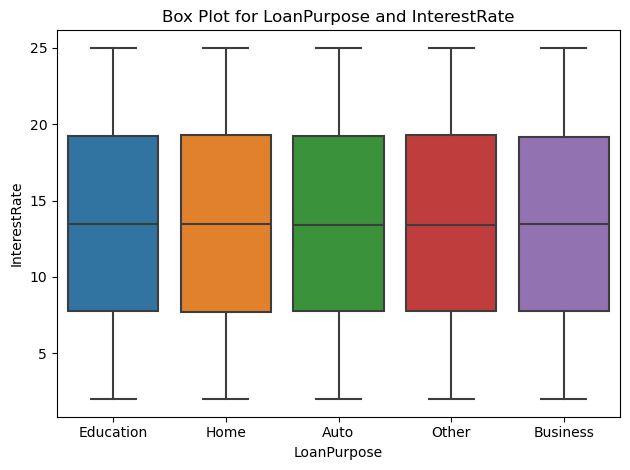

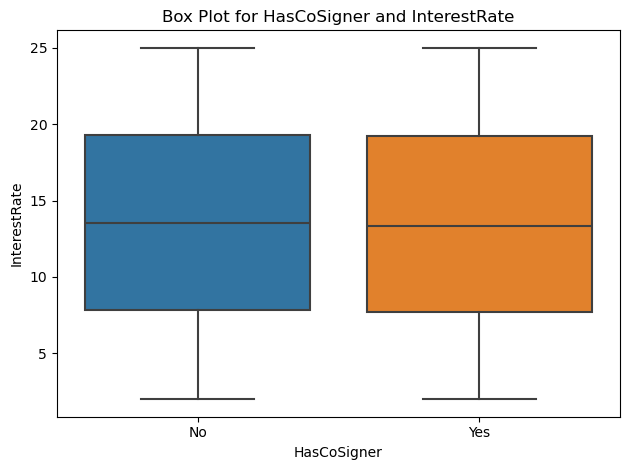

In [20]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'InterestRate')

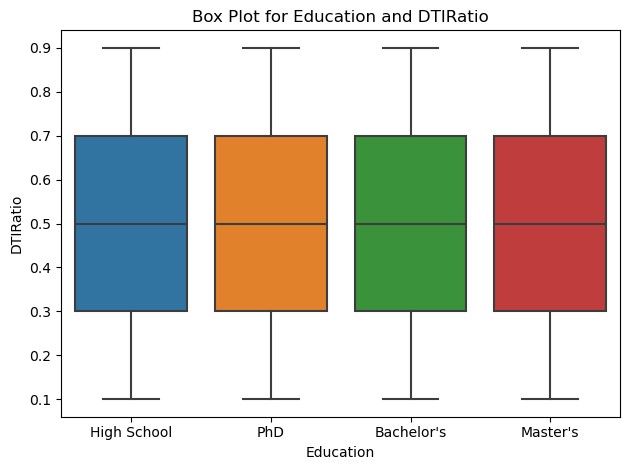

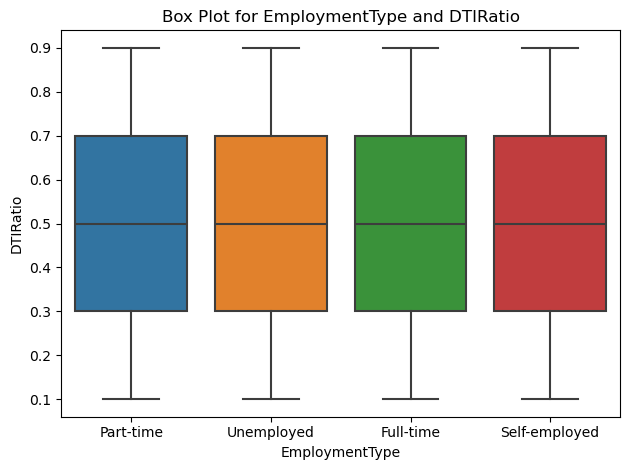

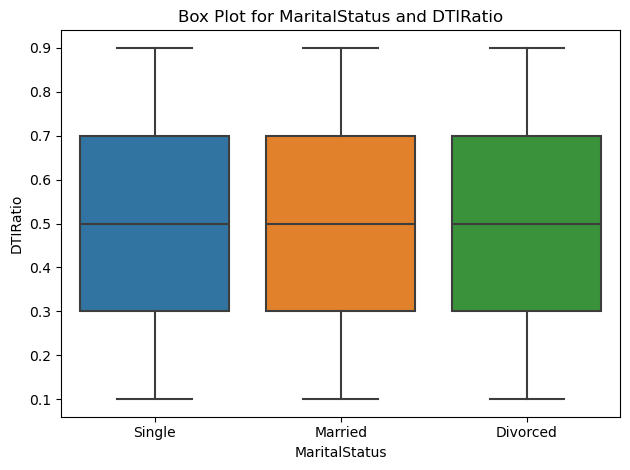

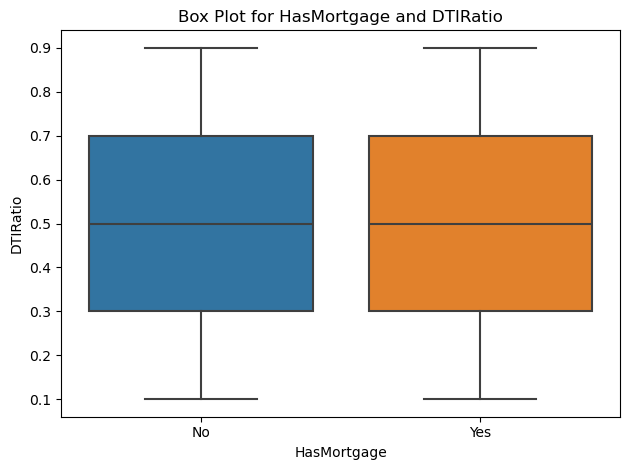

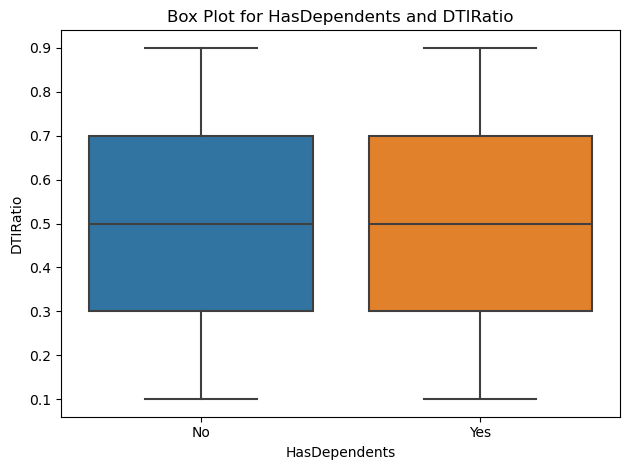

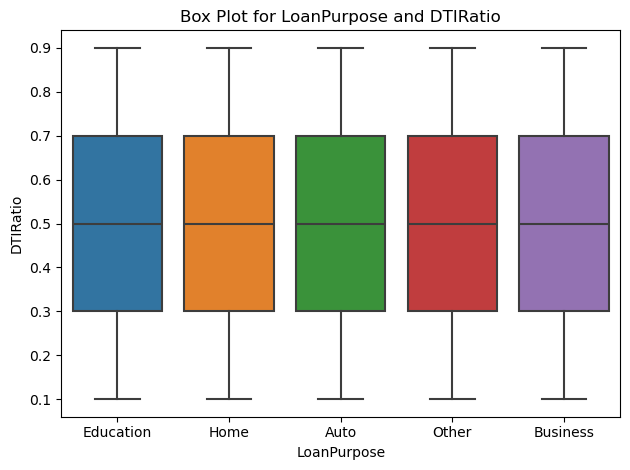

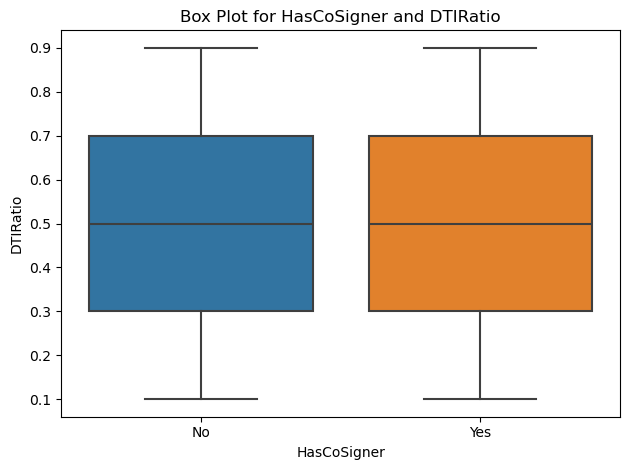

In [21]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'DTIRatio')

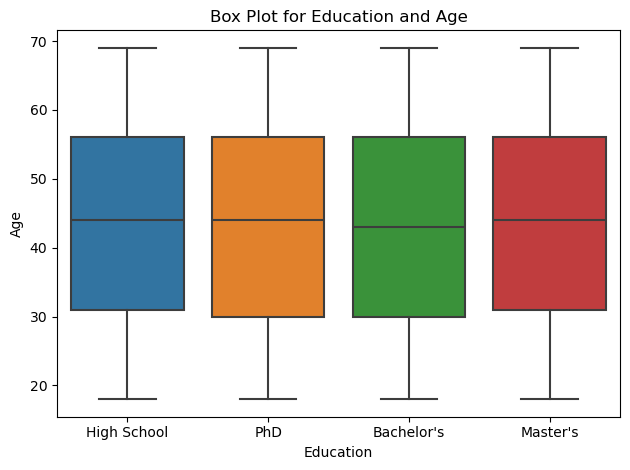

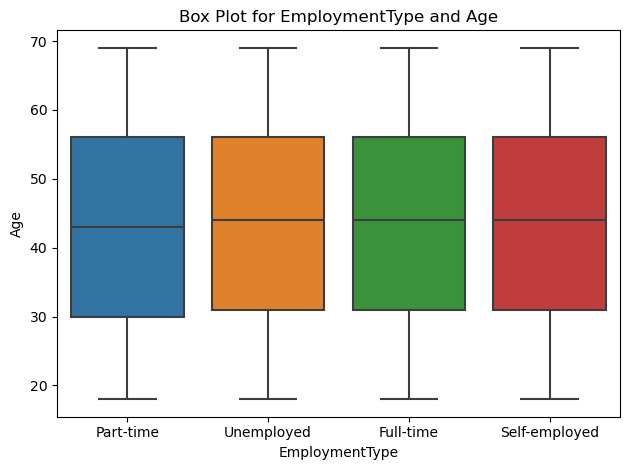

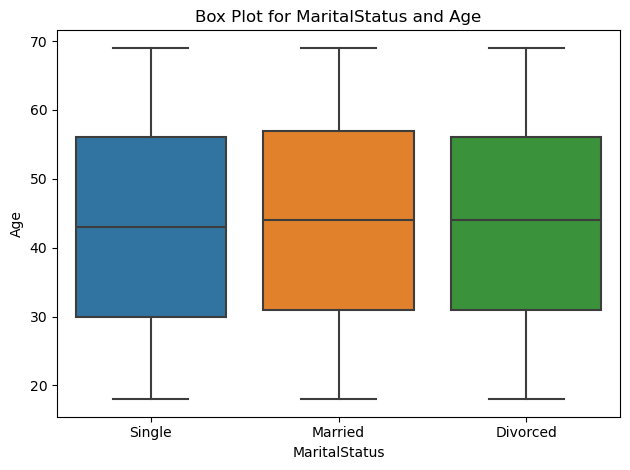

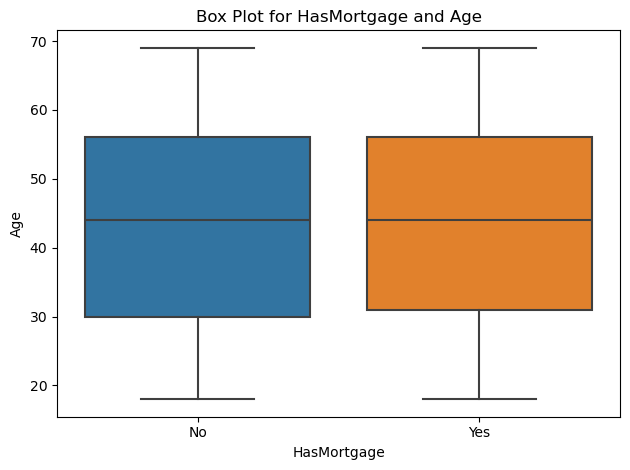

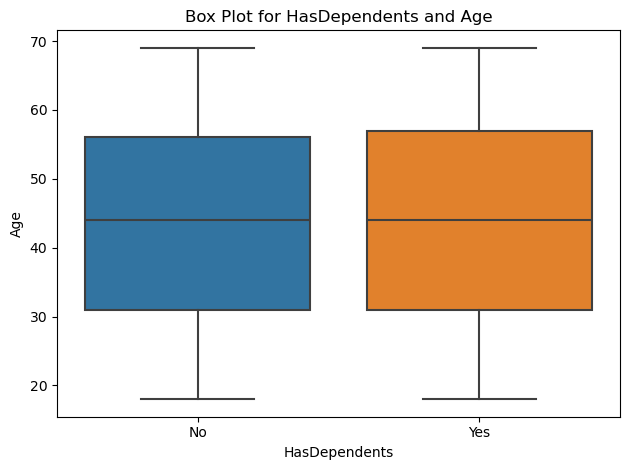

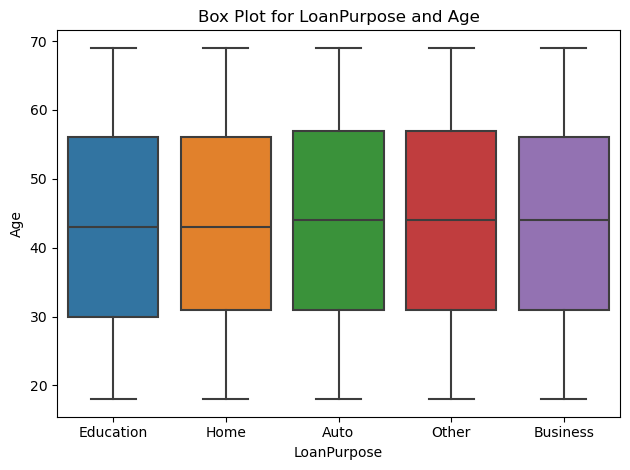

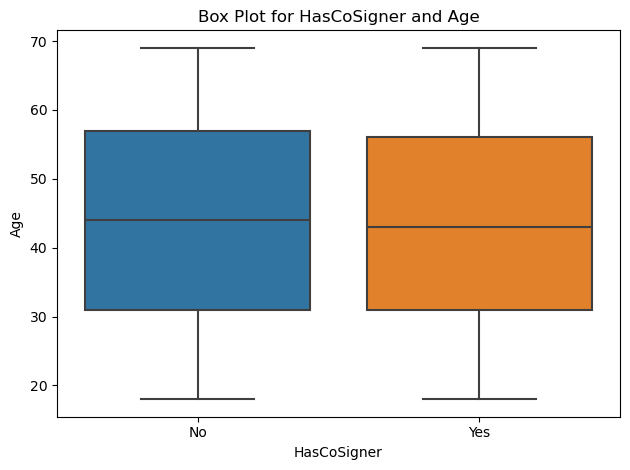

In [22]:
boxplot_2(default_train, ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], 'Age')